In [1]:
# run this on doberman
import numpy as np
from pymongo import MongoClient
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import scipy
from scipy.optimize import curve_fit
import os

In [2]:
client = MongoClient(os.environ['MONITOR_URI'])

In [14]:
controller_name = 'pfeiffer_tpg'
date_start = datetime(2018,8,10,12,0,0,0)
date_end = datetime(2018,8,12,12,0,0,0)
#date_end = None

In [15]:
db = client['data']
if controller_name not in db.list_collection_names(False):
    print('Didn\'t find a controller named %s' % controller_name)
else:
    when = []
    values = []
    cuts = {'when' : {'$gte' : date_start}}
    if date_end is not None:
        cuts['when'].update({'$lte' : date_end})
    for row in db[controller_name].find(cuts):
        when.append(row['when'])
        values.append(row['data'])
    values = np.array(values)
print('Loaded %i entries' % len(values))

{'when': {'$gte': datetime.datetime(2018, 8, 10, 12, 0), '$lte': datetime.datetime(2018, 8, 12, 12, 0)}}
Loaded 28488 entries


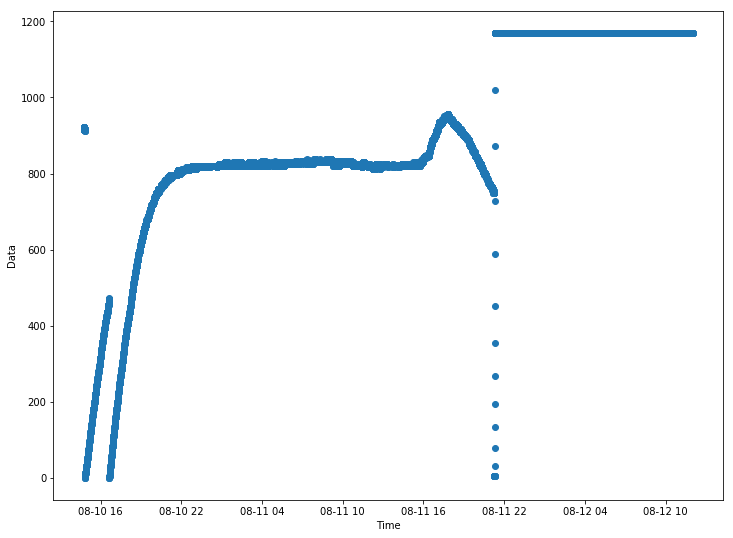

In [16]:
plt.figure(figsize=(12,9))

data_index = 0

plt.plot_date(when, values[:,data_index])
plt.xlabel('Time')
plt.ylabel('Data')
plt.show()

In [ ]:
import json
with open('%s_data.json' % controller_name, 'r') as f:
    d = {'when' : list(map(lambda x : x.timestamp, when)), 'values' : list(values[:,data_index])}
    json.dump(d,f)
    print("Data written to %s_data.json" % controller_name)